In [1]:
import math
import sys

import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
from playsound import playsound

In [2]:
def get_f0(wave):
    corr = np.correlate(wave, wave, "full")
    corr = corr[len(corr) // 2 :]

    def is_peak(corr, i):
        return 0 < i < len(corr) - 1 and corr[i - 1] < corr[i] < corr[i + 1]

    peakindices = [i for i in range(len(corr)) if is_peak(corr, i)]
    peakindices = [i for i in peakindices if i != 0]
    return max(peakindices, key=lambda index: corr[index])

In [5]:
# サンプリングレート
SR = 16000

# 音声ファイルの読み込み
a, _ = librosa.load("data/a.wav", sr=SR)
aiueo, _ = librosa.load("data/aiueo.wav", sr=SR)
man, _ = librosa.load("data/shs-test-man.wav", sr=SR)
woman, _ = librosa.load("data/shs-test-woman.wav", sr=SR)
print(a.shape)

print(get_f0(a), get_f0(man), get_f0(woman))

(19504,)
144 30 436


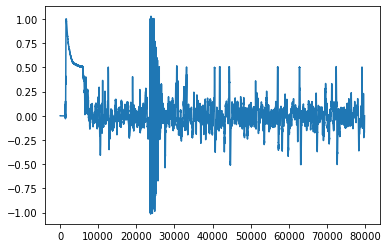

In [8]:
wave, _ = librosa.load("output.wav", sr=SR)
plt.plot(wave)

In [8]:
man.max(), man.min()

(0.6429431, -0.6232558)

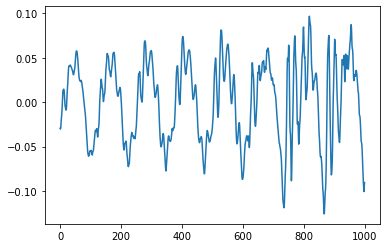

In [11]:
fig, ax = plt.subplots()
ax.plot(a[:1000])